In [1]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np

# 최대 출력 컬럼 제한 해제
pd.set_option('display.max_colwidth', None)

In [2]:
decks_df = pd.read_csv('덱 분류 완료 테이블.csv', encoding='utf-8')

In [3]:
## 분류 불가 조합 중 분류가 가능하지만 안된 조합 확인 - 대부분 분류가 잘 되었음

decks_df[decks_df['deck_name']=='분류 불가'] 

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,deck_name
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",분류 불가
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,1,...,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",분류 불가
5,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,rx1nmyxEddDyQujL2nvjfiHV_LDcBEo-zyf16l3BFnXQExOMoB6tNss-WGlc_GRgcac2tg1GhDgBhg,5,30,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Sylas, TFT11_Udyr, TFT11_Kindred, TFT11_Ornn, TFT11_Morgana, TFT11_KhaZix, TFT11_Yone, TFT11_Kayn",분류 불가
6,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,dMhhqa_djjUT5P2jeQePRwhWzHVNKrf35C-z45JPsSKvfREWIhtlWUGHWke8oO3pf3ADGHpBABqL6g,2,40,9,1,0,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Kayle, TFT11_Soraka, TFT11_Neeko, TFT11_Bard, TFT11_Zoe",분류 불가
8,KR_7005408175,1711608635465,2161.773926,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,_tFZFQDxr3ipe-amA8IMZiUugmCq6rhTN9YrLPthGkJSnh1TbAB9j1v4_pUGvH7UWmwnNM_jUtDhAw,7,27,9,1,0,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Ornn, TFT11_Azir, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_KogMaw",분류 불가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9268,KR_7005336302,1711603214529,2313.343262,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,82UUEzCoKgeGyf9IyLFJq6Nv_CXTgDXhLGPgT-S7ZPg4Bny88LPaAsY5X6uZkOLlKYsj_XEwUZbmDw,5,30,8,0,1,...,0,0,0,2,0,0,0,0,"TFT11_TahmKench, TFT11_Ornn, TFT11_Azir, TFT11_Annie, TFT11_Lillia, TFT11_KogMaw, TFT11_Nautilus, TFT11_ChoGath",분류 불가
9270,KR_7005336302,1711603214529,2313.343262,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,YqA52peYJJlNmsfgE2UnzhkqwXTUAOBp9O1FfclWv_mBvNcHpGIXIbbZ2y43cSaprBAJ73IQSFfr8w,7,27,8,0,1,...,0,0,0,0,2,0,0,0,"TFT11_Sylas, TFT11_Hwei, TFT11_Morgana, TFT11_KhaZix, TFT11_Kayn, TFT11_Irelia, TFT11_Qiyana, TFT11_Malphite",분류 불가
9273,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,eJBg1EVkQRS4fXbZKDAkyuQuYzL-kF1Ps7NOxHuwiAQ29VZgBEi20Je7sbVtqV-m-Y6ArWw2Hck5Iw,5,30,8,1,0,...,0,0,0,0,0,0,0,0,"TFT11_Galio, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",분류 불가
9279,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,ZWNe7oOLcVQzKNoExAYXKQm_oZr6KsjEXji5ilpOOsg2efr-Tjl5Xe-xI6fXwpzyI7zEWDMdTZPRHQ,4,30,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Udyr, TFT11_Aatrox, TFT11_WuKong, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi, TFT11_Nautilus",분류 불가


##### 각 덱의 갯수 확인

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50920 (\N{HANGUL SYLLABLE WE}) missing fr

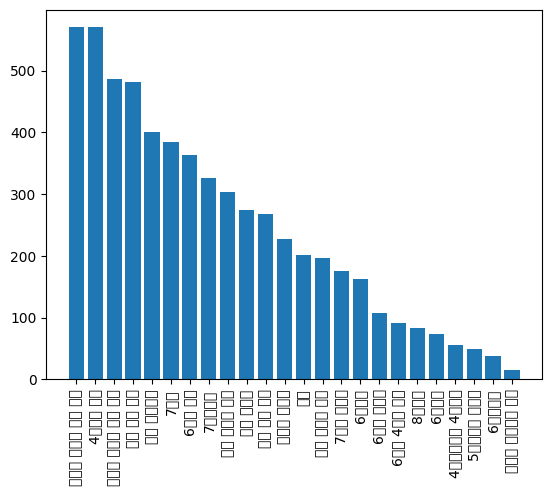

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# '분류 불가' 값을 제외
filtered_deck_counts = decks_df[decks_df['deck_name'] != '분류 불가']['deck_name'].value_counts()

# 그래프 생성
plt.bar(filtered_deck_counts.index, filtered_deck_counts.values)

plt.xticks(rotation=90)

plt.show()

#### 실제 태블로에 사용할 최종 조합 테이블 작성

##### 기존 테이블에서 필요한 부분만 슬라이싱

In [5]:
deck_statistic = decks_df.copy()

deck_statistic.head(1)

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,deck_name
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",분류 불가


In [6]:
deck_statistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 98 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameId         9288 non-null   object 
 1   game_datetime  9288 non-null   int64  
 2   game_length    9288 non-null   float64
 3   game_version   9288 non-null   object 
 4   puuid          9288 non-null   object 
 5   placement      9288 non-null   int64  
 6   last_round     9288 non-null   int64  
 7   level          9288 non-null   int64  
 8   이타심            9288 non-null   int64  
 9   거대 괴수          9288 non-null   int64  
 10  난동꾼            9288 non-null   int64  
 11  귀인             9288 non-null   int64  
 12  혼령             9288 non-null   int64  
 13  먹그림자           9288 non-null   int64  
 14  신화             9288 non-null   int64  
 15  정령 주술사         9288 non-null   int64  
 16  이야기꾼           9288 non-null   int64  
 17  재주꾼            9288 non-null   int64  
 18  암영      

In [7]:
deck_statistic.drop(columns=['gameId', 'puuid', 'game_datetime', 'game_datetime', 'game_version', 'Combination'], inplace=True)

deck_statistic.head(1)

,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,먹그림자,...,코부코,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,deck_name
0,2339.676514,7,28,8,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,분류 불가


##### 각 덱의 데이터 갯수를 표시해주는 deck_count 컬럼 생성

In [8]:
## 덱 카운트 컬럼 생성
deck_statistic['deck_count'] = None

deck_statistic.head(1)

,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,먹그림자,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,deck_name,deck_count
0,2339.676514,7,28,8,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,분류 불가,None


In [9]:
deck_statistic['deck_name'].unique()

array(['분류 불가', '나르 세나 리롤', '용군주 흐웨이 밸류 완성', '용군주 흐웨이 밸류 시도', '4용군주 밸류',
       '6혼령 리롤', '리롤 결투가', '6암영 4사신 요네', '6비전 마법사', '신화 바드 리롤', '6난동꾼',
       '7필연', '7이야기꾼', '아펠 아무무 리롤', '현자 모르가나', '6기원자', '6거대괴수', '난동꾼 카이사',
       '8결투가', '7신화 릴리아', '천계', '신화 코그모 리롤', '4비전마법사 4파수꾼', '5먹그림자 카이사',
       '숲지기 킨드레드 리롤'], dtype=object)

In [10]:
# 덱 이름 리스트
deck_names = ['분류 불가', '나르 세나 리롤', '용군주 흐웨이 밸류 완성', '용군주 흐웨이 밸류 시도', '4용군주 밸류',
              '6혼령 리롤', '리롤 결투가', '6암영 4사신 요네', '6비전 마법사', '신화 바드 리롤', '6난동꾼',
              '7필연', '7이야기꾼', '아펠 아무무 리롤', '현자 모르가나', '6기원자', '6거대괴수', '난동꾼 카이사',
              '8결투가', '7신화 릴리아', '천계', '신화 코그모 리롤', '4비전마법사 4파수꾼', '5먹그림자 카이사',
              '숲지기 킨드레드 리롤']

# 각 deck_name에 대해 작업을 반복
for deck_name in deck_names:
    deck_count = len(deck_statistic[deck_statistic['deck_name'] == deck_name])
    deck_statistic.loc[deck_statistic['deck_name'] == deck_name, 'deck_count'] = deck_count

deck_statistic

,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,먹그림자,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,deck_name,deck_count
0,2339.676514,7,28,8,0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,분류 불가,3385
1,2339.676514,1,40,9,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,나르 세나 리롤,268
2,2339.676514,4,34,9,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,용군주 흐웨이 밸류 완성,486
3,2339.676514,8,27,9,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,분류 불가,3385
4,2339.676514,6,28,8,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,용군주 흐웨이 밸류 시도,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,2173.421143,4,33,10,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,분류 불가,3385
9284,2173.421143,3,34,9,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,용군주 흐웨이 밸류 시도,570
9285,2173.421143,1,37,8,0,1,0,0,0,0,...,0,3,3,0,0,0,0,0,아펠 아무무 리롤,304
9286,2173.421143,6,28,8,0,0,0,0,3,1,...,0,0,0,0,0,0,0,0,6혼령 리롤,363


##### 승률 표시해주는 컬럼 생성

In [11]:
## 덱 승률 컬럼 생성
deck_statistic['deck_winrate'] = None

# 덱 이름 리스트
deck_names = ['분류 불가', '나르 세나 리롤', '용군주 흐웨이 밸류 완성', '용군주 흐웨이 밸류 시도', '4용군주 밸류',
              '6혼령 리롤', '리롤 결투가', '6암영 4사신 요네', '6비전 마법사', '신화 바드 리롤', '6난동꾼',
              '7필연', '7이야기꾼', '아펠 아무무 리롤', '현자 모르가나', '6기원자', '6거대괴수', '난동꾼 카이사',
              '8결투가', '7신화 릴리아', '천계', '신화 코그모 리롤', '4비전마법사 4파수꾼', '5먹그림자 카이사',
              '숲지기 킨드레드 리롤']

# 각 deck_name에 대해 작업을 반복
for deck_name in deck_names:
    deck_winrate = len(deck_statistic[(deck_statistic['deck_name'] == deck_name) & (deck_statistic['placement'] == 1)]) / len(deck_statistic[deck_statistic['deck_name'] == deck_name]) * 100
    deck_statistic.loc[deck_statistic['deck_name'] == deck_name, 'deck_winrate'] = deck_winrate

deck_statistic.head()

,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,먹그림자,...,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,deck_name,deck_count,deck_winrate
0,2339.676514,7,28,8,0,1,2,1,0,0,...,0,0,0,0,0,0,0,분류 불가,3385,9.039882
1,2339.676514,1,40,9,0,0,1,0,1,1,...,0,0,0,0,0,0,0,나르 세나 리롤,268,7.835821
2,2339.676514,4,34,9,1,1,0,0,0,0,...,0,0,0,0,0,0,0,용군주 흐웨이 밸류 완성,486,32.921811
3,2339.676514,8,27,9,0,1,1,0,0,0,...,0,0,0,0,0,0,0,분류 불가,3385,9.039882
4,2339.676514,6,28,8,0,1,1,0,0,0,...,0,0,0,0,0,0,0,용군주 흐웨이 밸류 시도,570,10.350877


##### 각 덱의 등장 픽률을 계산해주는 컬럼 생성

In [12]:
## 덱 승률 컬럼 생성
deck_statistic['deck_pickrate'] = None

# 덱 이름 리스트
deck_names = ['분류 불가', '나르 세나 리롤', '용군주 흐웨이 밸류 완성', '용군주 흐웨이 밸류 시도', '4용군주 밸류',
              '6혼령 리롤', '리롤 결투가', '6암영 4사신 요네', '6비전 마법사', '신화 바드 리롤', '6난동꾼',
              '7필연', '7이야기꾼', '아펠 아무무 리롤', '현자 모르가나', '6기원자', '6거대괴수', '난동꾼 카이사',
              '8결투가', '7신화 릴리아', '천계', '신화 코그모 리롤', '4비전마법사 4파수꾼', '5먹그림자 카이사',
              '숲지기 킨드레드 리롤']

# 각 deck_name에 대해 작업을 반복
for deck_name in deck_names:
   deck_pickrate = len(deck_statistic[deck_statistic['deck_name'] == deck_name]) / len(deck_statistic) * 100
   deck_statistic.loc[deck_statistic['deck_name'] == deck_name, 'deck_pickrate'] = deck_pickrate

deck_statistic.head()

,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,먹그림자,...,쓰레쉬,초가스,말파이트,가렌,티모,자야,deck_name,deck_count,deck_winrate,deck_pickrate
0,2339.676514,7,28,8,0,1,2,1,0,0,...,0,0,0,0,0,0,분류 불가,3385,9.039882,36.444875
1,2339.676514,1,40,9,0,0,1,0,1,1,...,0,0,0,0,0,0,나르 세나 리롤,268,7.835821,2.885444
2,2339.676514,4,34,9,1,1,0,0,0,0,...,0,0,0,0,0,0,용군주 흐웨이 밸류 완성,486,32.921811,5.232558
3,2339.676514,8,27,9,0,1,1,0,0,0,...,0,0,0,0,0,0,분류 불가,3385,9.039882,36.444875
4,2339.676514,6,28,8,0,1,1,0,0,0,...,0,0,0,0,0,0,용군주 흐웨이 밸류 시도,570,10.350877,6.136951


##### 각 덱의 순위 방어(4등 안쪽) 확률 계산 컬럼 생성

In [13]:
## 덱 승률 컬럼 생성
deck_statistic['deck_top4rate'] = None

# 덱 이름 리스트
deck_names = ['분류 불가', '나르 세나 리롤', '용군주 흐웨이 밸류 완성', '용군주 흐웨이 밸류 시도', '4용군주 밸류',
              '6혼령 리롤', '리롤 결투가', '6암영 4사신 요네', '6비전 마법사', '신화 바드 리롤', '6난동꾼',
              '7필연', '7이야기꾼', '아펠 아무무 리롤', '현자 모르가나', '6기원자', '6거대괴수', '난동꾼 카이사',
              '8결투가', '7신화 릴리아', '천계', '신화 코그모 리롤', '4비전마법사 4파수꾼', '5먹그림자 카이사',
              '숲지기 킨드레드 리롤']

# 각 deck_name에 대해 작업을 반복
for deck_name in deck_names:
    deck_top4rate = len(deck_statistic[(deck_statistic['deck_name'] == deck_name) & (deck_statistic['placement'] <= 4)]) / len(deck_statistic[deck_statistic['deck_name'] == deck_name]) * 100
    deck_statistic.loc[deck_statistic['deck_name'] == deck_name, 'deck_top4rate'] = deck_top4rate

deck_statistic.head()

,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,먹그림자,...,초가스,말파이트,가렌,티모,자야,deck_name,deck_count,deck_winrate,deck_pickrate,deck_top4rate
0,2339.676514,7,28,8,0,1,2,1,0,0,...,0,0,0,0,0,분류 불가,3385,9.039882,36.444875,39.822747
1,2339.676514,1,40,9,0,0,1,0,1,1,...,0,0,0,0,0,나르 세나 리롤,268,7.835821,2.885444,52.238806
2,2339.676514,4,34,9,1,1,0,0,0,0,...,0,0,0,0,0,용군주 흐웨이 밸류 완성,486,32.921811,5.232558,71.399177
3,2339.676514,8,27,9,0,1,1,0,0,0,...,0,0,0,0,0,분류 불가,3385,9.039882,36.444875,39.822747
4,2339.676514,6,28,8,0,1,1,0,0,0,...,0,0,0,0,0,용군주 흐웨이 밸류 시도,570,10.350877,6.136951,43.157895


##### groupby - 덱이름으로 각 덱의 평균 수치를 계산한 테이블을 생성

In [14]:
# deck_name을 기준으로 그룹화하여 나머지 열의 평균을 계산하고, 숫자 값을 소수점 셋째 자리에서 반올림합니다.
deck_statistic = deck_statistic.groupby('deck_name').mean().reset_index().round(2)

deck_statistic.sort_values(by='placement')

,deck_name,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,...,쓰레쉬,초가스,말파이트,가렌,티모,자야,deck_count,deck_winrate,deck_pickrate,deck_top4rate
22,용군주 흐웨이 밸류 완성,2218.58,3.16,34.86,9.31,0.86,0.95,0.01,0.03,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,486.0,32.921811,5.232558,71.399177
9,7신화 릴리아,2238.06,3.35,35.04,8.87,0.05,0.60,0.19,0.03,0.18,...,0.00,1.79,1.01,0.00,0.00,0.01,175.0,21.714286,1.884152,73.142857
7,6암영 4사신 요네,2226.50,3.43,35.15,8.47,0.00,0.42,0.15,0.07,0.26,...,0.05,0.00,0.01,0.00,0.00,0.00,91.0,10.989011,0.979759,74.725275
12,8결투가,2200.52,3.52,34.27,8.51,0.02,0.01,0.01,0.05,0.00,...,0.01,0.00,0.00,0.00,0.00,0.01,84.0,14.285714,0.904393,70.238095
8,6혼령 리롤,2194.64,3.67,34.29,8.27,0.01,0.56,0.14,0.04,3.11,...,0.03,0.00,0.00,0.00,0.00,0.00,363.0,14.600551,3.908269,68.870523
1,4용군주 밸류,2215.27,3.81,33.97,9.14,1.00,0.21,0.54,0.07,0.08,...,0.01,0.00,0.02,0.04,0.00,0.03,570.0,21.22807,6.136951,60.526316
23,천계,2220.52,3.82,33.77,9.00,0.43,0.56,0.02,0.07,0.29,...,0.02,0.00,1.79,0.01,0.00,0.02,201.0,28.358209,2.164083,56.218905
11,7필연,2213.60,3.82,33.84,8.63,0.00,0.69,0.01,0.08,0.02,...,2.14,0.00,0.01,0.00,0.00,0.00,384.0,17.1875,4.134367,63.541667
17,숲지기 킨드레드 리롤,2226.78,3.93,34.33,8.20,0.07,0.33,0.67,0.13,0.13,...,0.00,0.00,0.00,0.00,0.00,0.00,15.0,20.0,0.161499,66.666667
18,신화 바드 리롤,2212.41,4.15,33.47,8.05,1.34,0.00,1.01,0.06,0.00,...,0.00,0.00,0.02,0.00,0.00,0.00,481.0,13.305613,5.178725,57.588358


In [15]:
deck_statistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 97 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   deck_name      25 non-null     object 
 1   game_length    25 non-null     float64
 2   placement      25 non-null     float64
 3   last_round     25 non-null     float64
 4   level          25 non-null     float64
 5   이타심            25 non-null     float64
 6   거대 괴수          25 non-null     float64
 7   난동꾼            25 non-null     float64
 8   귀인             25 non-null     float64
 9   혼령             25 non-null     float64
 10  먹그림자           25 non-null     float64
 11  신화             25 non-null     float64
 12  정령 주술사         25 non-null     float64
 13  이야기꾼           25 non-null     float64
 14  재주꾼            25 non-null     float64
 15  암영             25 non-null     float64
 16  숲지기            25 non-null     float64
 17  필연             25 non-null     float64
 18  기원자         

##### 각 덱의 모범 조합 컬럼 생성

In [16]:
## 최대 9개의 칸 생성
deck_statistic['champion1'] = None
deck_statistic['champion2'] = None
deck_statistic['champion3'] = None
deck_statistic['champion4'] = None
deck_statistic['champion5'] = None
deck_statistic['champion6'] = None
deck_statistic['champion7'] = None
deck_statistic['champion8'] = None
deck_statistic['champion9'] = None

In [17]:
deck_statistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 106 entries, deck_name to champion9
dtypes: float64(92), object(14)
memory usage: 20.8+ KB


In [18]:
# 필터링을 통해 deck_name이 '6난동꾼'인 행 선택 후, champion1 값 출력 테스트
level_of_6난동꾼 = deck_statistic.loc[deck_statistic['deck_name'] == '6난동꾼', 'champion1'].values
print(level_of_6난동꾼)

[None]


In [19]:
# 4비전마법사 4파수꾼 덱 추천 조합 채워넣기
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '아리', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '쉔', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '아무무', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '일라오이', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '노틸러스', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '신드라', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '리산드라', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '4비전마법사 4파수꾼', '세트', deck_statistic['champion8'])

#check
deck_statistic[deck_statistic['deck_name']=='4비전마법사 4파수꾼']

,deck_name,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,...,deck_top4rate,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9
0,4비전마법사 4파수꾼,2211.85,4.35,33.11,8.75,0.0,0.05,0.02,0.05,0.18,...,49.090909,아리,쉔,아무무,일라오이,노틸러스,신드라,리산드라,세트,None


In [20]:
# 용군주 흐웨이 밸류 완성 덱 추천 조합 채워넣기
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '잔나', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '다이애나', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '소라카', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '오른', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '아지르', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '흐웨이', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '라칸', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '우디르', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 완성', '오공', deck_statistic['champion9'])

#check
deck_statistic[deck_statistic['deck_name']=='용군주 흐웨이 밸류 완성']

,deck_name,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,...,deck_top4rate,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9
22,용군주 흐웨이 밸류 완성,2218.58,3.16,34.86,9.31,0.86,0.95,0.01,0.03,0.01,...,71.399177,잔나,다이애나,소라카,오른,아지르,흐웨이,라칸,우디르,오공


In [21]:
# 7신화 릴리아 밸류 완성 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '초가스', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '코그모', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '니코', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '바드', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '탐 켄치', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '노틸러스', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '애니', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '7신화 릴리아', '흐웨이', deck_statistic['champion8'])

#check
deck_statistic[deck_statistic['deck_name']=='7신화 릴리아']

print(deck_statistic['deck_name'].unique())

['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [22]:
# 4용군주 밸류 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '잔나', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '다이애나', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '리 신', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '오른', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '라칸', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '아지르', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '오공', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '우디르', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '4용군주 밸류', '흐웨이', deck_statistic['champion9'])

#check
print(deck_statistic[deck_statistic['deck_name']=='4용군주 밸류'])

print(deck_statistic['deck_name'].unique())

  deck_name  game_length  placement  last_round  level  이타심  거대 괴수   난동꾼  \
1   4용군주 밸류      2215.27       3.81       33.97   9.14  1.0   0.21  0.54   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
1  0.07  0.08  ...      60.526316         잔나       다이애나        리 신         오른   

   champion5  champion6  champion7  champion8  champion9  
1         라칸        아지르         오공        우디르        흐웨이  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [23]:
#'5먹그림자 카이사' 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '잭스', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '아트록스', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '볼리베어', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '일라오이', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '오른', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '카이사', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '우디르', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '5먹그림자 카이사', '자야', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='5먹그림자 카이사'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
2  5먹그림자 카이사      2220.87       4.53       33.02   8.49  0.02   0.51  0.51   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
2  0.04  1.41  ...      53.061224         잭스       아트록스       볼리베어       일라오이   

   champion5  champion6  champion7  champion8  champion9  
2         오른        카이사        우디르         자야       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [24]:
# 6거대괴수 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '말파이트', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '초가스', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '쉔', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '요릭', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '쓰레쉬', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '오른', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '모르가나', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '6거대괴수', '오공', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='6거대괴수'])

print(deck_statistic['deck_name'].unique())

  deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
3     6거대괴수      2288.67       4.82       31.87   8.16  0.08    3.0  0.03   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
3  0.11  1.05  ...      52.631579       말파이트        초가스          쉔         요릭   

   champion5  champion6  champion7  champion8  champion9  
3        쓰레쉬         오른       모르가나         오공       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [25]:
# 6기원자 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '6기원자', '코그모', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '6기원자', '잔나', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '6기원자', '알룬', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '6기원자', '탐 켄치', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '6기원자', '릴리아', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '6기원자', '사일러스', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '6기원자', '애니', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '6기원자', '아지르', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='6기원자'])

print(deck_statistic['deck_name'].unique())

  deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
4      6기원자      2205.23       4.35       32.91   8.72  0.06   0.14  0.39   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
4  0.06  0.01  ...      53.374233        코그모         잔나         알룬       탐 켄치   

   champion5  champion6  champion7  champion8  champion9  
4        릴리아       사일러스         애니        아지르       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [26]:
# 6난동꾼 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '렉사이', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '코부코', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '리븐', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '자이라', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '소라카', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '탐 켄치', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '갈리오', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '6난동꾼', '사일러스', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='6난동꾼'])

print(deck_statistic['deck_name'].unique())

  deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
5      6난동꾼      2221.34       5.26       31.41   8.54  0.26    0.0  3.31   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
5  0.01  0.34  ...      33.783784        렉사이        코부코         리븐        자이라   

   champion5  champion6  champion7  champion8  champion9  
5        소라카       탐 켄치        갈리오       사일러스       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [27]:
# 6비전 마법사 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '아리', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '니코', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '럭스', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '쓰레쉬', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '일라오이', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '신드라', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '리산드라', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '6비전 마법사', '세트', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='6비전 마법사'])

print(deck_statistic['deck_name'].unique())

  deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
6   6비전 마법사      2212.69       4.88       31.78   8.38  0.04   0.12  0.04   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
6  0.06  0.07  ...      38.888889         아리         니코         럭스        쓰레쉬   

   champion5  champion6  champion7  champion8  champion9  
6       일라오이        신드라       리산드라         세트       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [28]:
# 6암영 4사신 요네 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '다리우스', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '카직스', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '요릭', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '킨드레드', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '알룬', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '요네', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '사일러스', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '케인', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '6암영 4사신 요네', '세트', deck_statistic['champion9'])

#check
print(deck_statistic[deck_statistic['deck_name']=='6암영 4사신 요네'])

print(deck_statistic['deck_name'].unique())

    deck_name  game_length  placement  last_round  level  이타심  거대 괴수   난동꾼  \
7  6암영 4사신 요네       2226.5       3.43       35.15   8.47  0.0   0.42  0.15   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
7  0.07  0.26  ...      74.725275       다리우스        카직스         요릭       킨드레드   

   champion5  champion6  champion7  champion8  champion9  
7         알룬         요네       사일러스         케인         세트  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [29]:
# 6혼령 리롤 덱 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '잭스', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '케이틀린', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '세나', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '쉔', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '아트록스', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '일라오이', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '모르가나', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '6혼령 리롤', '케인', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='6혼령 리롤'])

print(deck_statistic['deck_name'].unique())

  deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
8    6혼령 리롤      2194.64       3.67       34.29   8.27  0.01   0.56  0.14   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
8  0.04  3.11  ...      68.870523         잭스       케이틀린         세나          쉔   

   champion5  champion6  champion7  champion8  champion9  
8       아트록스       일라오이       모르가나         케인       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [30]:
# 7이야기꾼 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '가렌', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '시비르', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '리븐', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '자이라', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '조이', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '갈리오', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '리 신', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '7이야기꾼', '이렐리아', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='7이야기꾼'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
10     7이야기꾼      2206.71       4.22       33.23   8.82  0.76   0.02  1.02   

      귀인   혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
10  0.06  0.1  ...      59.509202         가렌        시비르         리븐        자이라   

    champion5  champion6  champion7  champion8  champion9  
10         조이        갈리오        리 신       이렐리아       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [31]:
# 7필연 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '7필연', '아리', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '7필연', '야스오', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '7필연', '킨드레드', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '7필연', '쓰레쉬', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '7필연', '아펠리오스', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '7필연', '신드라', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '7필연', '우디르', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '7필연', '세트', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='7필연'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level  이타심  거대 괴수   난동꾼  \
11       7필연       2213.6       3.82       33.84   8.63  0.0   0.69  0.01   

      귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  \
11  0.08  0.02  ...      63.541667         아리        야스오       킨드레드   

    champion4  champion5  champion6  champion7  champion8  champion9  
11        쓰레쉬      아펠리오스        신드라        우디르         세트       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [32]:
# 8결투가 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '8결투가', '다리우스', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '8결투가', '야스오', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '8결투가', '키아나', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '8결투가', '다이애나', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '8결투가', '트리스타나', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '8결투가', '볼리베어', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '8결투가', '리 신', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '8결투가', '이렐리아', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='8결투가'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
12      8결투가      2200.52       3.52       34.27   8.51  0.02   0.01  0.01   

      귀인   혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
12  0.05  0.0  ...      70.238095       다리우스        야스오        키아나       다이애나   

    champion5  champion6  champion7  champion8  champion9  
12      트리스타나       볼리베어        리 신       이렐리아       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [33]:
# 나르 세나 리롤 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '렉사이', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '잭스', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '케이틀린', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '나르', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '세나', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '아트록스', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '일라오이', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '나르 세나 리롤', '노틸러스', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='나르 세나 리롤'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
13  나르 세나 리롤      2221.08       4.42       32.79   7.88  0.01   0.19  0.93   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
13  0.1  0.97  ...      52.238806        렉사이         잭스       케이틀린         나르   

    champion5  champion6  champion7  champion8  champion9  
13         세나       아트록스       일라오이       노틸러스       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [34]:
# 난동꾼 카이사 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '시비르', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '리븐', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '아트록스', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '티모', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '갈리오', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '사일러스', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '카이사', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '우디르', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '난동꾼 카이사', '자야', deck_statistic['champion9'])

#check
print(deck_statistic[deck_statistic['deck_name']=='난동꾼 카이사'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수  난동꾼  \
14   난동꾼 카이사      2202.27       4.26       33.09    8.6  0.08   0.03  2.0   

      귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  \
14  0.04  0.04  ...      54.824561        시비르         리븐       아트록스   

    champion4  champion5  champion6  champion7  champion8  champion9  
14         티모        갈리오       사일러스        카이사        우디르         자야  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [35]:
# 리롤 결투가 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '야스오', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '키아나', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '다이애나', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '볼리베어', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '트리스타나', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '리 신', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '오공', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '리롤 결투가', '이렐리아', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='리롤 결투가'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
15    리롤 결투가      2212.12       4.67       32.62   7.89  0.04   0.02  0.01   

      귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  \
15  0.03  0.01  ...           50.0        야스오        키아나       다이애나   

    champion4  champion5  champion6  champion7  champion8  champion9  
15       볼리베어      트리스타나        리 신         오공       이렐리아       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [36]:
# 숲지기 킨드레드 리롤 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '렉사이', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '카직스', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '나르', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '킨드레드', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '요네', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '사일러스', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '오른', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '숲지기 킨드레드 리롤', '케인', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='숲지기 킨드레드 리롤'])

print(deck_statistic['deck_name'].unique())

      deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
17  숲지기 킨드레드 리롤      2226.78       3.93       34.33    8.2  0.07   0.33  0.67   

      귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  \
17  0.13  0.13  ...      66.666667        렉사이        카직스         나르   

    champion4  champion5  champion6  champion7  champion8  champion9  
17       킨드레드         요네       사일러스         오른         케인       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [37]:
# 신화 바드 리롤 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '시비르', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '니코', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '리븐', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '바드', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '소라카', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '조이', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '탐 켄치', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '라칸', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '신화 바드 리롤', '오공', deck_statistic['champion9'])

#check
print(deck_statistic[deck_statistic['deck_name']=='신화 바드 리롤'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
18  신화 바드 리롤      2212.41       4.15       33.47   8.05  1.34    0.0  1.01   

      귀인   혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
18  0.06  0.0  ...      57.588358        시비르         니코         리븐         바드   

    champion5  champion6  champion7  champion8  champion9  
18        소라카         조이       탐 켄치         라칸         오공  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [38]:
# 신화 코그모 리롤 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '말파이트', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '초가스', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '케이틀린', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '코그모', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '니코', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '일라오이', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '노틸러스', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '신화 코그모 리롤', '릴리아', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='신화 코그모 리롤'])

print(deck_statistic['deck_name'].unique())

    deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
19  신화 코그모 리롤      2228.77       4.67        32.4   8.15  0.02   1.04  0.03   

      귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  \
19  0.03  0.56  ...      51.530612       말파이트        초가스       케이틀린   

    champion4  champion5  champion6  champion7  champion8  champion9  
19        코그모         니코       일라오이       노틸러스        릴리아       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [39]:
# 아펠 아무무 리롤 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '쉔', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '킨드레드', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '아무무', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '일라오이', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '아펠리오스', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '쓰레쉬', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '신드라', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '애쉬', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '아펠 아무무 리롤', '세트', deck_statistic['champion9'])

#check
print(deck_statistic[deck_statistic['deck_name']=='아펠 아무무 리롤'])

print(deck_statistic['deck_name'].unique())

    deck_name  game_length  placement  last_round  level  이타심  거대 괴수  난동꾼  \
20  아펠 아무무 리롤      2193.77       4.55       32.48   7.94  0.0   0.73  0.0   

      귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  \
20  0.11  0.55  ...      47.697368          쉔       킨드레드        아무무   

    champion4  champion5  champion6  champion7  champion8  champion9  
20       일라오이      아펠리오스        쓰레쉬        신드라         애쉬         세트  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [40]:
# 천계 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '천계', '말파이트', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '천계', '카직스', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '천계', '키아나', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '천계', '니코', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '천계', '다이애나', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '천계', '소라카', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '천계', '리 신', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '천계', '라칸', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '천계', '오공', deck_statistic['champion9'])

#check
print(deck_statistic[deck_statistic['deck_name']=='천계'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
23        천계      2220.52       3.82       33.77    9.0  0.43   0.56  0.02   

      귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  \
23  0.07  0.29  ...      56.218905       말파이트        카직스        키아나   

    champion4  champion5  champion6  champion7  champion8  champion9  
23         니코       다이애나        소라카        리 신         라칸         오공  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [41]:
# 현자 모르가나 추천 조합 채워넣기 (탐 켄치, 리 신  -  띄어쓰기 주의)
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '리븐', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '자이라', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '다이애나', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '소라카', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '갈리오', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '모르가나', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '케인', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '현자 모르가나', '오공', deck_statistic['champion8'])

#check
print(deck_statistic[deck_statistic['deck_name']=='현자 모르가나'])

print(deck_statistic['deck_name'].unique())

   deck_name  game_length  placement  last_round  level   이타심  거대 괴수   난동꾼  \
24   현자 모르가나      2206.61       5.12        31.4   8.64  1.13   0.03  1.08   

     귀인    혼령  ...  deck_top4rate  champion1  champion2  champion3  champion4  \
24  0.1  0.69  ...           35.0         리븐        자이라       다이애나        소라카   

    champion5  champion6  champion7  champion8  champion9  
24        갈리오       모르가나         케인         오공       None  

[1 rows x 106 columns]
['4비전마법사 4파수꾼' '4용군주 밸류' '5먹그림자 카이사' '6거대괴수' '6기원자' '6난동꾼' '6비전 마법사'
 '6암영 4사신 요네' '6혼령 리롤' '7신화 릴리아' '7이야기꾼' '7필연' '8결투가' '나르 세나 리롤' '난동꾼 카이사'
 '리롤 결투가' '분류 불가' '숲지기 킨드레드 리롤' '신화 바드 리롤' '신화 코그모 리롤' '아펠 아무무 리롤'
 '용군주 흐웨이 밸류 시도' '용군주 흐웨이 밸류 완성' '천계' '현자 모르가나']


In [42]:
# 용군주 흐웨이 밸류 시도 덱 추천 조합 채워넣기
deck_statistic['champion1']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '잔나', deck_statistic['champion1'])
deck_statistic['champion2']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '다이애나', deck_statistic['champion2'])
deck_statistic['champion3']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '소라카', deck_statistic['champion3'])
deck_statistic['champion4']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '오른', deck_statistic['champion4'])
deck_statistic['champion5']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '아지르', deck_statistic['champion5'])
deck_statistic['champion6']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '흐웨이', deck_statistic['champion6'])
deck_statistic['champion7']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '라칸', deck_statistic['champion7'])
deck_statistic['champion8']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '우디르', deck_statistic['champion8'])
deck_statistic['champion9']  = np.where(deck_statistic['deck_name'] == '용군주 흐웨이 밸류 시도', '오공', deck_statistic['champion9'])

#check
deck_statistic[deck_statistic['deck_name']=='용군주 흐웨이 밸류 시도']

,deck_name,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,...,deck_top4rate,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9
21,용군주 흐웨이 밸류 시도,2213.95,4.94,31.62,9.0,0.64,0.76,0.15,0.09,0.07,...,43.157895,잔나,다이애나,소라카,오른,아지르,흐웨이,라칸,우디르,오공


In [43]:
deck_statistic

,deck_name,game_length,placement,last_round,level,이타심,거대 괴수,난동꾼,귀인,혼령,...,deck_top4rate,champion1,champion2,champion3,champion4,champion5,champion6,champion7,champion8,champion9
0,4비전마법사 4파수꾼,2211.85,4.35,33.11,8.75,0.00,0.05,0.02,0.05,0.18,...,49.090909,아리,쉔,아무무,일라오이,노틸러스,신드라,리산드라,세트,None
1,4용군주 밸류,2215.27,3.81,33.97,9.14,1.00,0.21,0.54,0.07,0.08,...,60.526316,잔나,다이애나,리 신,오른,라칸,아지르,오공,우디르,흐웨이
2,5먹그림자 카이사,2220.87,4.53,33.02,8.49,0.02,0.51,0.51,0.04,1.41,...,53.061224,잭스,아트록스,볼리베어,일라오이,오른,카이사,우디르,자야,None
3,6거대괴수,2288.67,4.82,31.87,8.16,0.08,3.00,0.03,0.11,1.05,...,52.631579,말파이트,초가스,쉔,요릭,쓰레쉬,오른,모르가나,오공,None
4,6기원자,2205.23,4.35,32.91,8.72,0.06,0.14,0.39,0.06,0.01,...,53.374233,코그모,잔나,알룬,탐 켄치,릴리아,사일러스,애니,아지르,None
5,6난동꾼,2221.34,5.26,31.41,8.54,0.26,0.00,3.31,0.01,0.34,...,33.783784,렉사이,코부코,리븐,자이라,소라카,탐 켄치,갈리오,사일러스,None
6,6비전 마법사,2212.69,4.88,31.78,8.38,0.04,0.12,0.04,0.06,0.07,...,38.888889,아리,니코,럭스,쓰레쉬,일라오이,신드라,리산드라,세트,None
7,6암영 4사신 요네,2226.50,3.43,35.15,8.47,0.00,0.42,0.15,0.07,0.26,...,74.725275,다리우스,카직스,요릭,킨드레드,알룬,요네,사일러스,케인,세트
8,6혼령 리롤,2194.64,3.67,34.29,8.27,0.01,0.56,0.14,0.04,3.11,...,68.870523,잭스,케이틀린,세나,쉔,아트록스,일라오이,모르가나,케인,None
9,7신화 릴리아,2238.06,3.35,35.04,8.87,0.05,0.60,0.19,0.03,0.18,...,73.142857,초가스,코그모,니코,바드,탐 켄치,노틸러스,애니,흐웨이,None


In [44]:
deck_statistic.to_csv('덱 통계량과 추천 조합(태블로용 최종본).csv', index=False)